In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.Understading the Data

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#It looks like there are quite a few missing values for age and cabin and a couple for embraked.
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Look at categorical and numerical features separately 
cat_features = titanic[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
num_features = titanic[['Age', 'SibSp', 'Parch', 'Fare']]

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

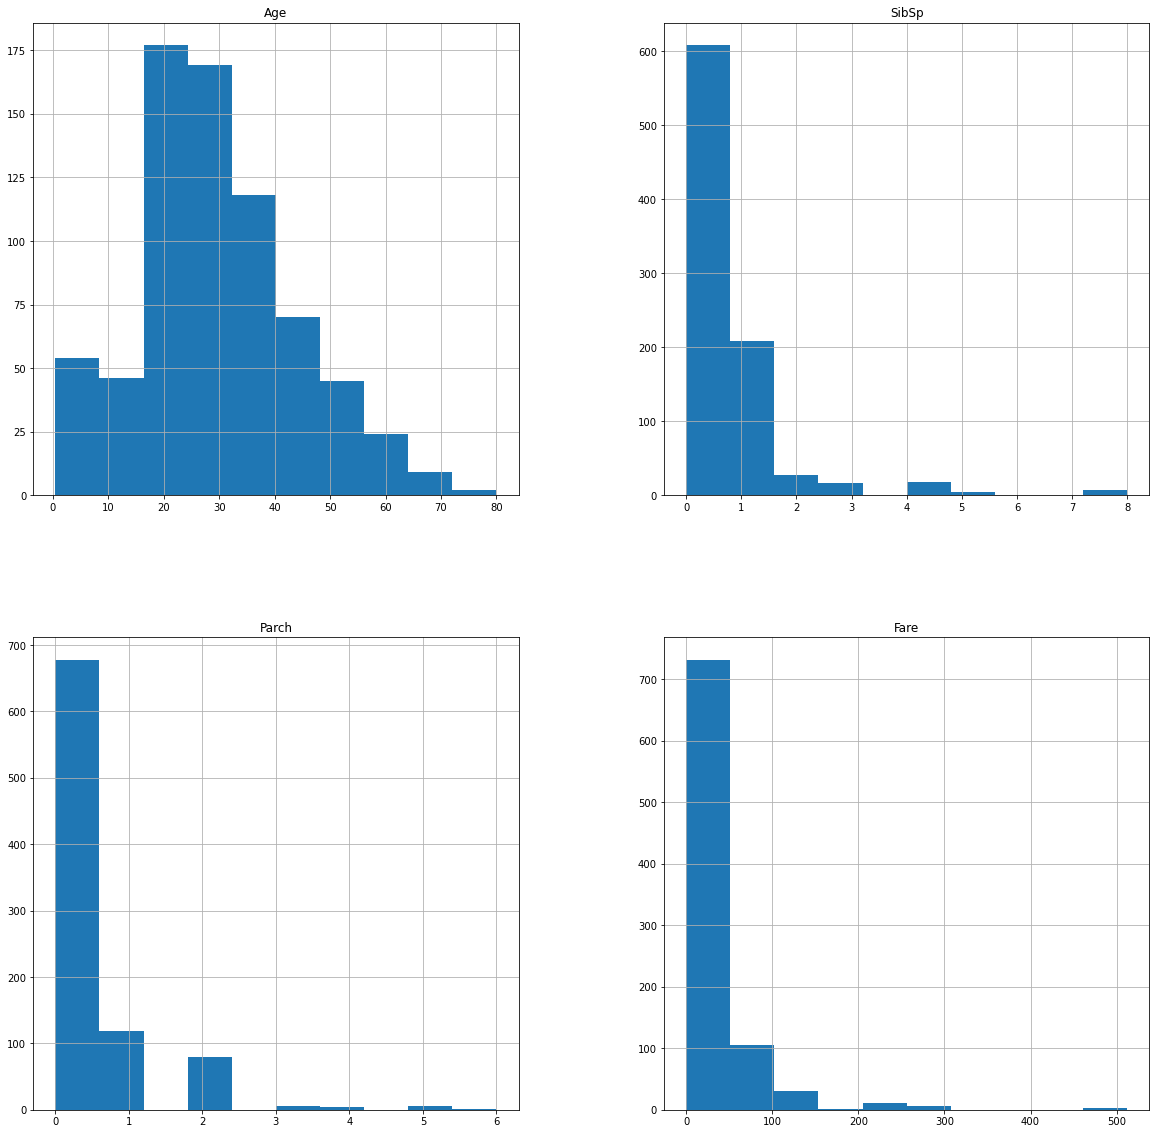

In [6]:
# Look at distribution of num
num_features.hist(figsize=(20,20))

In [7]:
#A lot of non-normal distributions that will need normalising. 
#Num features against the target 
pd.pivot_table(titanic, index='Survived', values=num_features)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [8]:
num_features.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


No large correlations. Largest is between parents/children and siblings/spouse. May be indicative of large families.

In [9]:
#Now for cat features
cat_features

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S
...,...,...,...,...,...,...
886,0,2,male,211536,NaN,S
887,1,1,female,112053,B42,S
888,0,3,female,W./C. 6607,NaN,S
889,1,1,male,111369,C148,C


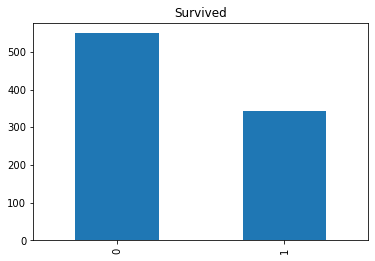

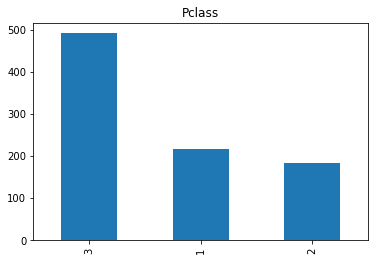

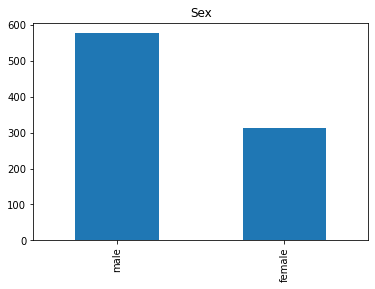

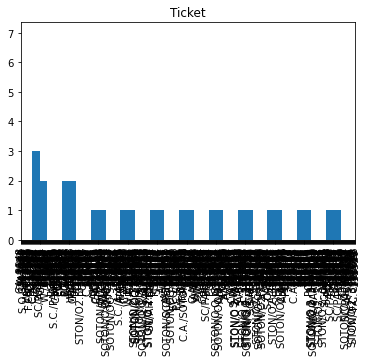

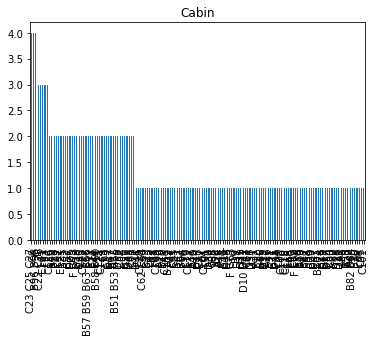

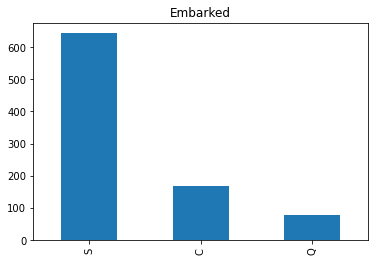

In [10]:
for cat in cat_features:
    titanic[cat].value_counts().plot.bar()
    plt.title(cat)
    plt.show()


More people survived than not. There are more third class and male passengers and majority left from Southampton.

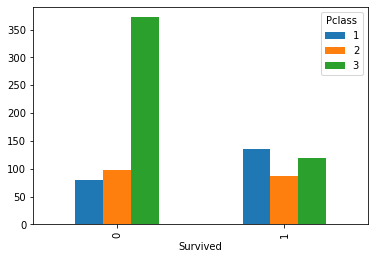

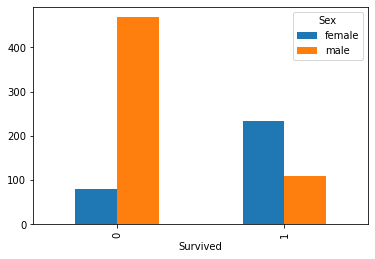

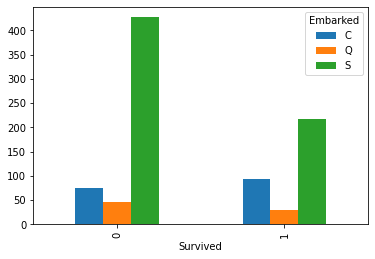

In [11]:
# Cat against target
for cat in ['Pclass', 'Sex', 'Embarked']:
    pd.pivot_table(titanic, index='Survived', columns=titanic[cat], values='Ticket',aggfunc='count').plot(kind='bar')

Large disparity in male/ female survival rates. Higher survival rates for 1st class passengers also noteworthy. All the features can engineered.

## 2. Feature Engineering

In [12]:
#add interactionfeatures for sex and embarked
titanic['Sex_Embarked'] = titanic.Sex + '_' + titanic.Embarked

In [13]:
#add interactionfeatures for Pclass and sex
titanic['str_Pclass'] = titanic.Pclass.apply(lambda x: str(x))
titanic['Pclass_sex'] = titanic['str_Pclass'] + '_' + titanic['Sex']

In [14]:
#add interactionfeatures for Embarked and Pclass
titanic['Embarked_Pclass'] = titanic['Embarked'] + '_' + titanic['str_Pclass']

In [15]:
#create cabin letter and treat NA as category 
titanic['cabin_letter'] = titanic.Cabin.apply(lambda x: str(x)[0])

<AxesSubplot:xlabel='Survived'>

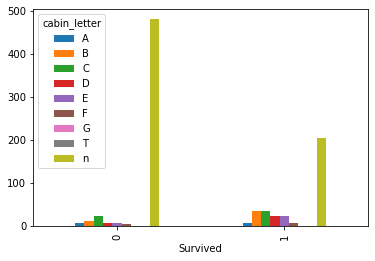

In [16]:
pd.pivot_table(titanic, index='Survived', columns='cabin_letter', values='Ticket',aggfunc='count').plot(kind='bar')

More survived for in cabins with letters and less for those without letters (n).

## 3.Preparing Data

In [17]:
#drop 2 NaN values from Embarked 
#impute mean for age
#encouding:'Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass', 
#target encouding: 'cabin_letter'
#normalise:fare LATER
#standardise:all 

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [19]:
#drop 2 NaN values from Embarked 
titanic.dropna(subset=['Embarked'], inplace=True)

In [20]:
#impute mean for age
titanic.Age = titanic.Age.fillna(titanic.Age.mean())

In [21]:
#OH Encouding:'Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass'
OH_features = ['Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass']
OH_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_enc.fit_transform(titanic[OH_features]))
OH_cols_train.index = titanic.index

titanic_drop = titanic.drop(OH_features, axis=1)

OH_titanic = pd.concat([titanic_drop, OH_cols_train], axis=1)

In [22]:
#lable encoder 'cabin_letter' not all the same letters appear in training and test sets
label_titanic = OH_titanic.copy()

label_encoder = LabelEncoder()
label_titanic['cabin_label'] = label_encoder.fit_transform(OH_titanic['cabin_letter'])

In [23]:
#standardise:all 
to_scale =[ 'Pclass', 'Age','SibSp','Parch','Fare',               0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,      'cabin_label']
scaler = StandardScaler()
titanic_scaled = label_titanic.copy()
titanic_scaled[to_scale] = scaler.fit_transform(titanic_scaled[to_scale])


## 4. Model Building

In [24]:
# Try the following model
#1.Naive Bayes
#2.Decision Tree
#3.Logistic Regression
#4.KNeighborsClassifier 
#5.Random Forest
#6.Support Vector Classifier
#7.Xtreme Gradient Boosting

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [26]:
y_train = titanic_scaled.Survived
features = ['Pclass', 'Age', 'SibSp','Parch','Fare',                                                         0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,            'cabin_label']
X_train = titanic_scaled[features]

In [27]:
#1.Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
cv = cross_val_score(nb_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.76404494 0.75842697 0.74719101 0.78089888 0.81355932]
Cross val mean: 0.7728242239573415


In [28]:
#2.Decision Tree
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train,y_train)
cv = cross_val_score(tree_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.75280899 0.7752809  0.79775281 0.75280899 0.83050847]
Cross val mean: 0.7818320319939059


In [29]:
#3.Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
cv = cross_val_score(log_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.81460674 0.80337079 0.81460674 0.78651685 0.81920904]
Cross val mean: 0.8076620326287056


In [30]:
#4.KNeighborsClassifier 
KN_model = KNeighborsClassifier()
KN_model.fit(X_train,y_train)
cv = cross_val_score(KN_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.80337079 0.7752809  0.83707865 0.80898876 0.85310734]
Cross val mean: 0.8155652891512727


In [31]:
#5.Random Forest
ranfor_model = RandomForestClassifier(random_state=0)
ranfor_model.fit(X_train,y_train)
cv = cross_val_score(ranfor_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.76404494 0.79213483 0.84831461 0.79213483 0.84180791]
Cross val mean: 0.8076874246175333


In [48]:
#6.Support Vector Classifier
SVC_model = SVC(probability=True)
SVC_model.fit(X_train,y_train)
cv = cross_val_score(SVC_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.79213483 0.80337079 0.83146067 0.78651685 0.82485876]
Cross val mean: 0.8076683806259124


In [33]:
#7.Xtreme Gradient Boosting
XGB_model = XGBClassifier(random_state =0)
XGB_model.fit(X_train,y_train)
cv = cross_val_score(XGB_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.81460674 0.81460674 0.84269663 0.79213483 0.84745763]
Cross val mean: 0.8223005141877738


In [34]:
#1.Naive Bayes 0.7728242239573415
#2.Decision Tree 0.7863327620135847
#3.Logistic Regression 0.8076620326287056
#4.KNeighborsClassifier 0.8155652891512727
#5.Random Forest 0.8088110201231512
#6.Support Vector Classifier 0.8076683806259124
#7.Xtreme Gradient Boosting 0.8223005141877738

Logistic Regression, Random Forest, Support Vector Classifier, Xtreme Gradient Boosting seem the best. 

## 5.Tune Models

In [35]:
#1. Logistic Regression
#2. Random Forest
#3. Support Vector Classifier 
#4. Xtreme Gradient Boosting

In [36]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [37]:
#1. Logistic Regression
log_model = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'], 'C': np.logspace(-4, 4, 20), }

Log_grid = GridSearchCV(log_model, param_grid, cv=5, verbose=True, return_train_score=True)

Log_grid.fit(X_train, y_train)

print (Log_grid.best_score_, Log_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
0.813305402145623 {'C': 0.03359818286283781, 'penalty': 'l2'}
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.0s finished


In [43]:
#2. Random Forest
rf_model = RandomForestClassifier(random_state=0,)

param_grid = { 'n_estimators': [150, 200, 300, 500],'criterion' :['gini'], 'max_features': ['auto'],'max_depth' : [3, 5, 10, 20],}


rf_rand = RandomizedSearchCV(rf_model, param_grid, n_iter=50, cv=5, verbose=True, return_train_score=True,n_jobs=-1)

rf_rand.fit(X_train, y_train)

print (rf_rand.best_score_, rf_rand.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   13.8s finished
0.8256713007046276 {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}


In [55]:
#3. Support Vector Classifier 
SVC_model = SVC()
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

SVC_model = SVC(probability=True)
SVC_grid = GridSearchCV(SVC_model, param_grid, cv=5, verbose=True, return_train_score=True, n_jobs=-1)

SVC_grid.fit(X_train, y_train)

print (SVC_grid.best_score_, SVC_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
0.8155652891512728 {'C': 1, 'gamma': 0.1}
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.7s finished


In [41]:
#4. Xtreme Gradient Boosting
XGB_model = XGBClassifier(random_state =0)
param_grid = {'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5],
                'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],
                'max_depth': [3, 4, 5]}

XGB_rand = RandomizedSearchCV(XGB_model, param_grid, n_iter=50, cv=5, verbose=True, return_train_score=True, n_jobs=-1)

XGB_rand.fit(X_train, y_train)

print (XGB_rand.best_score_, XGB_rand.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.0s
0.840297086269282 {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 2, 'colsample_bytree': 1.0}
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    6.7s finished


## 6. Combine Models

In [44]:
from sklearn.ensemble import VotingClassifier

In [56]:
#1. Logistic Regression
#2. Random Forest
#3. Support Vector Classifier 
#4. Xtreme Gradient Boosting

log_best = Log_grid.best_estimator_
rf_best = rf_rand.best_estimator_
SVC_best = SVC_grid.best_estimator_
XGB_best = XGB_rand.best_estimator_


estimators = [('log_best', log_best),
              ('rf_best', rf_best),  
              ('SVC_best', SVC_best),
              ('XGB_best', XGB_best), 
              ]

In [46]:
estimators = [('log_best', log_best),
              ('rf_best', rf_best),  
              ('SVC_best', SVC_best),
              ('XGB_best', XGB_best), 
              ]

vote_hard = VotingClassifier(estimators, verbose=True, n_jobs=-1, voting='hard')

vote_hard.fit(X_train,y_train)
cv = cross_val_score(vote_hard, X_train, y_train,cv=5 )
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.80898876 0.83707865 0.85955056 0.79213483 0.84745763]
Cross val mean: 0.8290420872214816


In [57]:
vote_soft = VotingClassifier(estimators, verbose=True, n_jobs=-1, voting='soft')

vote_soft.fit(X_train,y_train)
cv = cross_val_score(vote_soft, X_train, y_train,cv=5 )
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.81460674 0.82022472 0.84831461 0.80337079 0.83615819]
Cross val mean: 0.824535009204596


## 7. Test Model

### Make test set 

In [119]:
titanic_test = pd.read_csv('test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
titanic_test['Sex_Embarked'] = titanic_test.Sex + '_' + titanic_test.Embarked
titanic_test['str_Pclass'] = titanic_test.Pclass.apply(lambda x: str(x))
titanic_test['Pclass_sex'] = titanic_test['str_Pclass'] + '_' + titanic_test['Sex']
titanic_test['Embarked_Pclass'] = titanic_test['Embarked'] + '_' + titanic_test['str_Pclass']
titanic_test['cabin_letter'] = titanic_test.Cabin.apply(lambda x: str(x)[0])

In [121]:
titanic_test.dropna(subset=['Embarked'], inplace=True)
titanic_test.Age = titanic_test.Age.fillna(titanic_test.Age.mean())

In [123]:
OH_features = ['Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass']
OH_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_test = pd.DataFrame(OH_enc.fit_transform(titanic_test[OH_features]))
OH_cols_test.index = titanic_test.index

titanic__test_drop = titanic_test.drop(OH_features, axis=1)

OH_titanic_test = pd.concat([titanic__test_drop, OH_cols_test], axis=1)

In [124]:
label_titanic_test = OH_titanic_test.copy()

label_titanic_test['cabin_label'] = label_encoder.transform(OH_titanic_test['cabin_letter'])

In [125]:
to_scale =[ 'Pclass', 'Age','SibSp','Parch','Fare',               0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,      'cabin_label']
titanic_scaled_test = label_titanic_test.copy()
titanic_scaled_test[to_scale] = scaler.transform(label_titanic_test[to_scale])

In [126]:
features = ['Pclass', 'Age', 'SibSp','Parch','Fare',                                                         0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,            'cabin_label']
X_test = titanic_scaled_test[features]

In [128]:
X_test.Fare.fillna(method='bfill', inplace=True)

### Test Model

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [76]:
final_model = XGBClassifier(random_state =0, subsample =1.0, min_child_weight= 5, max_depth= 4, gamma= 0.5, colsample_bytree= 0.8)

final_model.fit(X_train, y_train)


XGBClassifier(colsample_bytree=0.8, gamma=0.5, max_depth=4, min_child_weight=5,
              subsample=1.0)

In [77]:
sorted(zip(final_model.feature_importances_, features), reverse=True)

[(0.30406338, 0),
 (0.18348145, 1),
 (0.14430398, 25),
 (0.07658198, 15),
 (0.050134294, 'Pclass'),
 (0.037130497, 'cabin_label'),
 (0.03465809, 7),
 (0.018473202, 11),
 (0.01590537, 'Age'),
 (0.014649444, 4),
 (0.013184452, 'Parch'),
 (0.012981164, 12),
 (0.01244033, 'SibSp'),
 (0.012250443, 'Fare'),
 (0.009053433, 10),
 (0.008998471, 14),
 (0.008965275, 17),
 (0.008363963, 23),
 (0.0078058476, 19),
 (0.006680343, 2),
 (0.0058851307, 22),
 (0.0045455373, 16),
 (0.0037722592, 6),
 (0.0029456543, 13),
 (0.002746003, 3),
 (0.0, 24),
 (0.0, 21),
 (0.0, 20),
 (0.0, 18),
 (0.0, 9),
 (0.0, 8),
 (0.0, 5)]

In [91]:
predictions = final_model.predict(X_train)
roc_auc_score(y_train, predictions)

0.863712096860602

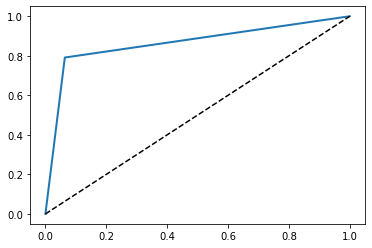

In [79]:
fpr, tpr, thresholds = roc_curve(y_train, predictions)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 

plot_roc_curve(fpr, tpr)
plt.show()

In [94]:
predictions = final_model.predict(X_test)

In [81]:
output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions})
output.to_csv('my22_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [1]:
#voting classifier w/ hard and soft voting 

### Test hard and soft models

In [68]:
predictions_hard = vote_hard.predict(X_train)
roc_auc_score(y_train, predictions_hard)

0.8247830279652845

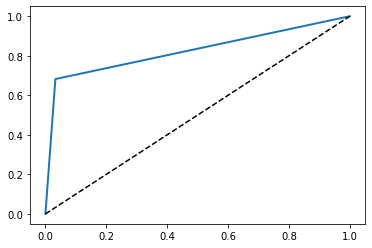

In [69]:
fpr, tpr, thresholds = roc_curve(y_train, predictions_hard)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 

plot_roc_curve(fpr, tpr)
plt.show()

In [130]:
predictions_hard = vote_hard.predict(X_test)

In [132]:
output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions_hard})
output.to_csv('hard_vote_submission.csv', index=False)

### soft voting model

In [70]:
predictions_soft = vote_soft.predict(X_train)
roc_auc_score(y_train, predictions_soft)

0.8386451301832208

In [ ]:
predictions = final_model.predict(X_test)

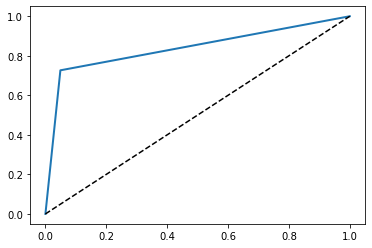

In [71]:
fpr, tpr, thresholds = roc_curve(y_train, predictions_soft)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 

plot_roc_curve(fpr, tpr)
plt.show()

In [134]:
predictions_soft = vote_soft.predict(X_test)
output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions_soft})
output.to_csv('soft_vote_submission.csv', index=False)